# Quantum Neural Networks with Qiskit Tutorial

This tutorial covers the basics of setting up a quantum neural network (QNN) using Qiskit and explores building hybrid quantum-classical models.

In [6]:
# from qiskit_machine_learning.utils import algorithm_globals
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 42

ImportError: cannot import name 'algorithm_globals' from 'qiskit_machine_learning.utils' (/home/jan/.local/lib/python3.10/site-packages/qiskit_machine_learning/utils/__init__.py)

### Define Quantum Circuit with Parameters

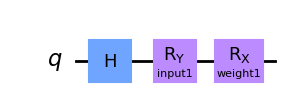

In [3]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl", style="clifford")

### Define Observable for Quantum Measurement

In [4]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

### Create Estimator Quantum Neural Network (QNN)

In [5]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(
    circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]]
)
estimator_qnn

ModuleNotFoundError: No module named 'qiskit_machine_learning'

### Extend Quantum Circuit for Multiple Qubits

In [ ]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

### Create Sampler QNN

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

### Forward Pass and Backpropagation

In [ ]:
# Forward pass
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

# Backpropagation
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Input gradients: {estimator_qnn_input_grad}")
print(f"Weight gradients: {estimator_qnn_weight_grad}")

### Handle Parity and Output Shape

In [ ]:
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=inputs2,
    weight_params=weights2,
    interpret=parity,
    output_shape=output_shape,
)

In [ ]:
# Check Qiskit Version
import tutorial_magics

%qiskit_version_table
%qiskit_copyright